In [111]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy

In [188]:
filename = '/Users/baird/Dropbox/_data_observations/CALIPSO/CAL_LID_L2_05kmCPro-Standard-V4-10.2018-05-31T17-55-21ZN.hdf'

In [189]:
ds = xarray.open_dataset(filename)

In [191]:
lat = ds['Latitude'].values
lon = ds['Longitude'].values

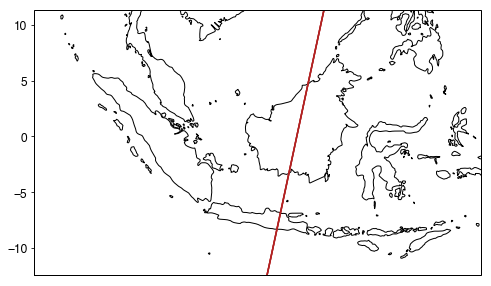

In [193]:
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

In [217]:
cod_data = ds['Column_Optical_Depth_Cloud_532'].values
tbc_data = ds['Total_Backscatter_Coefficient_532'].values
ec_data = ds['Extinction_Coefficient_532'].values
rh_data = ds['Relative_Humidity'].values
p_data = ds['Pressure'].values
igbp_data = ds['IGBP_Surface_Type'].values
clf_data = ds['Cloud_Layer_Fraction'].values
avd_data = ds['Atmospheric_Volume_Description'].values
tab_data = ds['Total_Backscatter_Coefficient_532'].values
ciab_data = ds['Column_Integrated_Attenuated_Backscatter_532'].values

In [221]:
ciab_data.shape

(3744, 399)

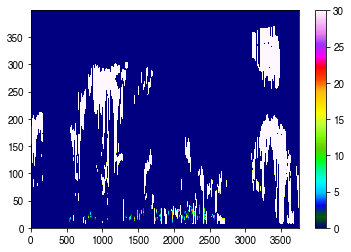

In [223]:
mp.pcolormesh(clf_data.T[::-1,:]/30, cmap='gist_ncar'); mp.colorbar()

In [206]:
iwc_data = ds['Ice_Water_Content_Profile'].values

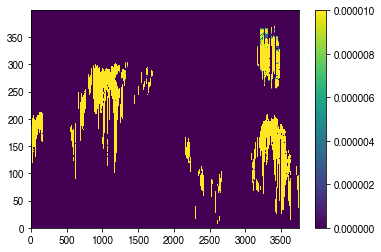

In [211]:
mp.pcolormesh(iwc_data.T[::-1,:], vmin=0, vmax=1e-5); mp.colorbar()

In [224]:
tbc_data[igbp_data[:,0]==17,:]=numpy.nan
rh_data[igbp_data[:,0]==17,:]=numpy.nan
clf_data[igbp_data[:,0]==17,:]=numpy.nan

In [196]:
lat_2d = numpy.repeat(lat[:,0], p_data.shape[1]).reshape((p_data.shape))

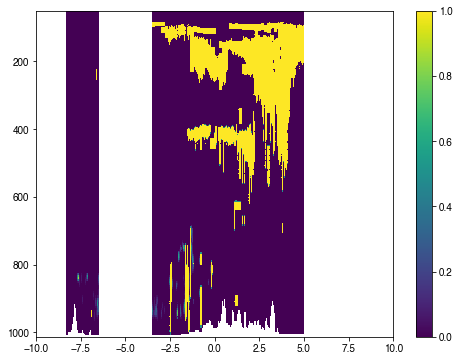

In [226]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     clf_data.T[::-1,:]/30/30, vmin=0, vmax=1)

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

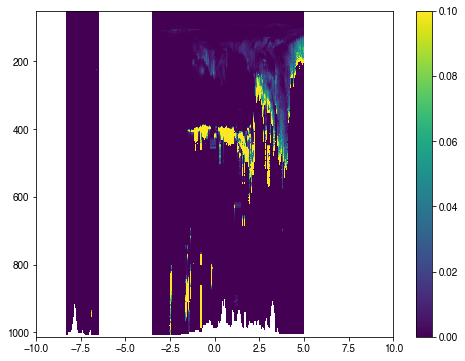

In [197]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     tbc_data.T[::-1,:], vmin=0, vmax=0.1)

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

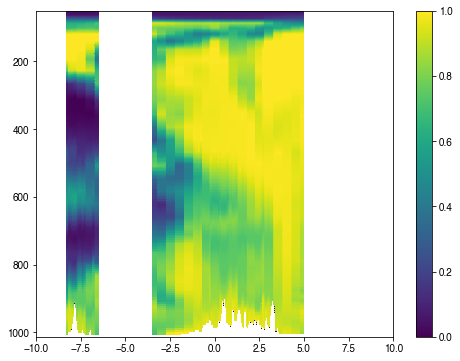

In [198]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     rh_data.T[::-1,:], vmin=0, vmax=1)

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

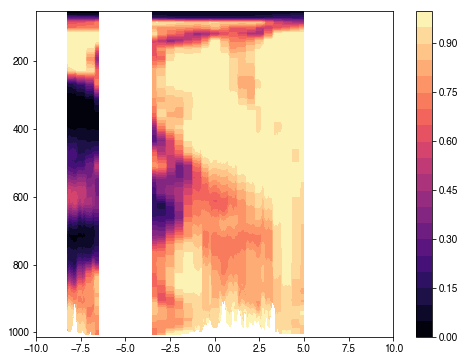

In [203]:
fig = mp.figure(figsize=(8,6))

clevels = numpy.arange(0,1.01,0.05)
ax = fig.add_subplot(111)
plot = ax.contourf(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     rh_data.T[::-1,:], levels=clevels, cmap='magma')

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

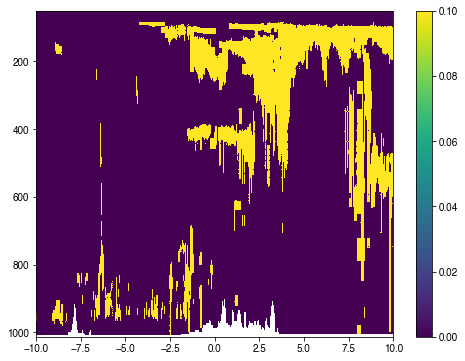

In [186]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     clf_data.T[::-1,:], vmin=0, vmax=.1)

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)